In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [41]:
df = pd.read_csv('input/diamonds_train.csv')
df = df.set_index('id')
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.78,Premium,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,0.31,Ideal,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,0.30,Ideal,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,0.65,Ideal,J,SI1,61.4,55.0,5.58,5.62,3.44,1276


In [3]:
y = df.price

In [4]:
X = df.drop(['price'], axis=1)

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,0.78,Premium,F,VS1,61.5,58.0,5.93,5.98,3.66
1,0.31,Ideal,D,SI1,60.8,56.0,4.37,4.32,2.64
2,0.30,Ideal,F,SI1,62.3,54.0,4.30,4.34,2.69
3,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03
4,0.65,Ideal,J,SI1,61.4,55.0,5.58,5.62,3.44


carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

--------------------------

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64


,carat,depth,table,x,y,z
count,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000
mean,0.797699,61.749721,57.449421,5.730824,5.734808,3.537958
std,0.474309,1.427728,2.234087,1.121767,1.151536,0.695039
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,10.740000,58.900000,8.060000


,carat,depth,table,x,y,z
carat,1.000000,0.023118,0.181725,0.976267,0.945757,0.968685
depth,0.023118,1.000000,-0.299534,-0.028765,-0.032894,0.092482
table,0.181725,-0.299534,1.000000,0.195775,0.182559,0.154399
x,0.976267,-0.028765,0.195775,1.000000,0.967143,0.985385
y,0.945757,-0.032894,0.182559,0.967143,1.000000,0.960350
z,0.968685,0.092482,0.154399,0.985385,0.960350,1.000000


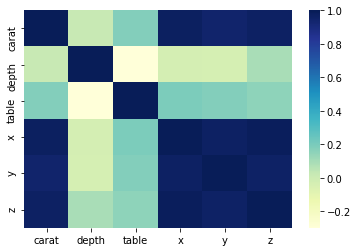

In [5]:
display(X.head())
print(X.dtypes)
print('\n--------------------------\n')
print(X.isnull().sum())
display(X.describe())
display(X.corr())
corr = X.corr()
X.corr()
plt.figure()
sns.heatmap(corr, cmap='YlGnBu')

In [6]:
X = pd.get_dummies(X)

In [7]:
X.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
id,,,,,,,,,,,,,,,,,,,,,
0,0.78,61.5,58.0,5.93,5.98,3.66,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0.31,60.8,56.0,4.37,4.32,2.64,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.30,62.3,54.0,4.30,4.34,2.69,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,1.04,62.0,58.0,6.54,6.46,4.03,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0.65,61.4,55.0,5.58,5.62,3.44,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0


In [8]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
pipeline = [
    StandardScaler(),
    Normalizer(),
]

tr = make_pipeline(*pipeline)

Xpr = tr.fit_transform(X)
Xpr = pd.DataFrame(Xpr,columns=X.columns)

In [9]:
Xpr.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-0.009185,-0.043055,0.060664,0.043707,0.052413,0.043223,-0.043135,-0.077411,-0.201014,0.420328,...,-0.082722,-0.057244,-0.029230,-0.045923,-0.138582,-0.111649,0.583680,-0.133445,-0.066418,-0.079824
1,-0.225122,-0.145639,-0.142044,-0.265599,-0.268997,-0.282862,-0.038366,-0.068852,0.268102,-0.128215,...,-0.073576,-0.050915,-0.025999,-0.040846,0.388885,-0.099305,-0.092332,-0.118692,-0.059075,-0.070999
2,-0.233629,0.085814,-0.343770,-0.283992,-0.269686,-0.271636,-0.039016,-0.070019,0.272643,-0.130387,...,-0.074822,-0.051778,-0.026439,-0.041538,0.395472,-0.100987,-0.093896,-0.120702,-0.060076,-0.072201
3,0.113765,0.039039,0.054883,0.160641,0.140246,0.157656,-0.039024,-0.070034,0.272703,-0.130415,...,-0.074838,-0.051789,-0.026445,-0.041547,-0.125375,-0.101009,-0.093916,-0.120728,-0.060089,0.686727
4,-0.059535,-0.046831,-0.209615,-0.025706,-0.019061,-0.026946,-0.033503,-0.060124,0.234117,-0.111962,...,-0.064249,0.822104,-0.022703,-0.035668,0.339589,-0.086717,-0.080628,-0.103646,-0.051587,-0.061998


In [10]:
from sklearn.model_selection import train_test_split

Xpr_train, Xpr_test, y_train, y_test = train_test_split(Xpr, y, test_size=0.2)

In [42]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(Xpr_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# cargar el dataframe de test

In [13]:
X1 = pd.read_csv('input/diamonds_test.csv')

In [14]:
X1.shape

(13449, 10)

In [15]:
X1 = X1.set_index('id')

In [16]:
X1 = pd.get_dummies(X1)

In [28]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
pipeline = [
    StandardScaler(),
    Normalizer(),
]

tr = make_pipeline(*pipeline)

Xpr1 = tr.fit_transform(X1)
Xpr1 = pd.DataFrame(Xpr1,columns=X1.columns)

In [29]:
Xpr1.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.147211,0.072967,0.053016,0.196605,0.179009,0.184056,-0.039961,-0.073764,-0.186380,0.390961,...,-0.075463,-0.055043,-0.026646,-0.041545,-0.131401,0.509671,-0.097685,-0.124645,-0.061769,-0.072366
1,-0.143558,0.123594,-0.050878,-0.139043,-0.134062,-0.115329,-0.040857,-0.075418,0.288745,-0.137652,...,0.713147,-0.056278,-0.027244,-0.042476,0.409557,-0.105590,-0.099876,-0.127440,-0.063155,-0.073990
2,0.454334,0.018951,0.117856,0.373935,0.368467,0.349623,-0.030230,-0.055802,-0.140995,0.295759,...,-0.057087,-0.041640,-0.020158,-0.031428,0.303030,-0.078126,-0.073898,-0.094293,-0.046728,-0.054745
3,0.195290,-0.270728,0.251430,0.245078,0.236390,0.188089,-0.038857,-0.071727,-0.181234,0.380165,...,-0.073379,-0.053523,-0.025910,-0.040398,0.389511,-0.100422,-0.094988,-0.121203,-0.060064,-0.070368
4,-0.141301,0.010610,-0.298377,-0.110942,-0.124240,-0.109912,-0.046700,-0.086204,0.330041,-0.157338,...,-0.088190,-0.064327,-0.031140,-0.048551,0.468131,-0.120692,-0.114160,-0.145667,-0.072187,-0.084571


In [30]:
# Aplicar lo mismo que en train hasta antes de entrenar el modelo

In [31]:
price = model.predict(Xpr1)

In [32]:
Xpr1['price']=price

In [33]:
Xpr1.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,0.147211,0.072967,0.053016,0.196605,0.179009,0.184056,-0.039961,-0.073764,-0.186380,0.390961,...,-0.055043,-0.026646,-0.041545,-0.131401,0.509671,-0.097685,-0.124645,-0.061769,-0.072366,4666.023924
1,-0.143558,0.123594,-0.050878,-0.139043,-0.134062,-0.115329,-0.040857,-0.075418,0.288745,-0.137652,...,-0.056278,-0.027244,-0.042476,0.409557,-0.105590,-0.099876,-0.127440,-0.063155,-0.073990,-405.512712
2,0.454334,0.018951,0.117856,0.373935,0.368467,0.349623,-0.030230,-0.055802,-0.140995,0.295759,...,-0.041640,-0.020158,-0.031428,0.303030,-0.078126,-0.073898,-0.094293,-0.046728,-0.054745,15826.130264
3,0.195290,-0.270728,0.251430,0.245078,0.236390,0.188089,-0.038857,-0.071727,-0.181234,0.380165,...,-0.053523,-0.025910,-0.040398,0.389511,-0.100422,-0.094988,-0.121203,-0.060064,-0.070368,7987.833047
4,-0.141301,0.010610,-0.298377,-0.110942,-0.124240,-0.109912,-0.046700,-0.086204,0.330041,-0.157338,...,-0.064327,-0.031140,-0.048551,0.468131,-0.120692,-0.114160,-0.145667,-0.072187,-0.084571,945.726537


In [34]:
df_submmit = Xpr1[['price']]

In [38]:
df_submmit.index.name='id'

In [39]:
df_submmit

,price
id,
0,4666.023924
1,-405.512712
2,15826.130264
3,7987.833047
4,945.726537
...,...
13444,747.443381
13445,2888.316640
13446,1746.272758


In [36]:
#estoooooo

In [40]:
df_submmit.to_csv("input/prueba1.csv")